# Выход компании в плюс

## Описание задачи

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.   
Задача — разобраться в причинах и помочь компании выйти в плюс.  
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

## Описание данных

В распоряжении три датасета.   
- `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта  
- `orders_info_short.csv` — информацию о покупках  
- `costs_info_short.csv` — информацию о расходах на рекламу.  

Структура `visits_info_short.csv`
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.  

Структура `orders_info_short.csv`
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.  

Структура `costs_info_short.csv`  
- `Channel` — идентификатор рекламного источника,
- `Dt` — дата проведения рекламной кампании,
- `Costs` — расходы на эту кампанию.

## Загрузим данные и подготовим их в анализу

In [70]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from datetime import datetime, timedelta

In [71]:
# зададим дефолтные настройки отображения таблиц и графиков
pd.set_option('display.float_format', '{:_.3f}'.format)
pd.set_option('display.max_rows', 50)
plt.rcParams['font.size'] = '12'
plt.rcParams['figure.figsize'] = (15, 8)

### Считаем файлы о визитах, заказах и рекламных тратах в переменные

In [72]:
# считываем файлы с данными
try:
    df_visits = pd.read_csv('visits_info_short.csv')
    df_orders = pd.read_csv('orders_info_short.csv')
    df_costs = pd.read_csv('costs_info_short.csv')
except:
    df_visits = pd.read_csv('/datasets/visits_info_short.csv')
    df_orders = pd.read_csv('/datasets/orders_info_short.csv')
    df_costs = pd.read_csv('/datasets/costs_info_short.csv')

### Подготовим данные к анализу. Проверим типы данных. Проверим отсутствие дубликатов.

#### df_visits

In [73]:
# смотрим общую игформацию `df_visits`
display(df_visits.info())
display(df_visits.head())
print(f'Всего {df_visits.duplicated().sum()} дубликатов в датасете')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Всего 0 дубликатов в датасете


Всего 309_901 записей.  
Пропуски и дубликаты отсутствуют в датасете.  
Колонки `Session Start` и `Session End` типа объект приведем к типу дата.  
Приведём названия колонок в соответствии со змеиным стилем и в нижний регистр.

In [74]:
# приведем колонки к нижнему регистру взмеином стиле
df_visits.columns = df_visits.columns.str.lower().str.replace(' ','_')

In [75]:
# приведем столбцы с датами к типу дата
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])

#### df_orders

In [76]:
# смотрим общую игформацию `df_orders`
display(df_orders.info())
display(df_orders.head())
print(f'Всего {df_orders.duplicated().sum()} дубликатов в датасете')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


Всего 0 дубликатов в датасете


Всего 40212 записей в датасете.  
Пропуски и дубликаты отстутствуют.  
Столбец `Event Dt` приведём к типу дата и все столбцы приведём в нижний регистр в змеином стиле.

In [77]:
# приведем колонки к нижнему регистру взмеином стиле
df_orders.columns = df_orders.columns.str.lower().str.replace(' ','_')
# к типу дата столбец приводим
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])

#### df_costs

In [78]:
# смотрим общую игформацию `df_costs`
display(df_costs.info())
display(df_costs.head())
print(f'Всего {df_costs.duplicated().sum()} дубликатов в датасете')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


Всего 0 дубликатов в датасете


Всего 1800 записей.  
Пропуски и дубликаты отсутствуют.  
Все столбцы приведём в нижний регистр.

In [79]:
# приведем колонки к нижнему регистру
df_costs.columns = df_costs.columns.str.lower()
# к типу дата столбец приводим
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

### Функция get_profiles

In [80]:
# функция для создания пользовательских профилей

def get_profiles(df_visits, df_orders, df_costs):

    # находим параметры первых посещений
    profiles = (
        df_visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(df_orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # приводим дату к типу дата для объединения датасетов
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединяем траты на рекламу и число привлечённых пользователей
    df_costs = df_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    df_costs['acquisition_cost'] = df_costs['costs'] / df_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        df_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция get_retention

In [81]:
# функция для расчёта удержания

def get_retention(profiles, df_visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(df_visits[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция get_conversion

In [82]:
# функция для расчёта конверсии

def get_conversion(profiles, df_orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_df_orders = (
        df_orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(first_df_orders[['user_id', 'event_dt']], on='user_id', how='left')

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_ltv

In [83]:
# функция для расчёта LTV и ROI

def get_ltv(profiles, df_orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(df_orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для сглаживания рисунков

In [84]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция plot_retention

In [85]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 12))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [name for name in retention_history.index.names if name not in ['dt', 'payer']]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show() 

### Функция plot_conversion

In [86]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 7))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция plot_ltv_roi

In [87]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    fig = plt.figure(figsize=(15, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # первый график — кривые ltv

    ax1 = fig.add_subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize = 10)

    # третий график — динамика cac
    
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize = 10)

    # четвёртый график — кривые roi
    
    ax4 = fig.add_subplot(2, 2, 3)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    
    ax5 = fig.add_subplot(2, 2, 4, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Создаём пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [88]:
# создаём пользовательский профиль
profiles = get_profiles(df_visits, df_orders, df_costs)

In [89]:
# определяем первого и последнего привлеченного пользователя в нашем датасете
user_min_time = profiles.query('first_ts == first_ts.min()')
user_max_time = profiles.query('first_ts == first_ts.max()')

In [90]:
print(f'Первое привлечение пользователя {user_min_time.first_ts.values[0]} с канала {user_min_time.channel.values[0]}\
с устройства {user_min_time.device.values[0]} и со страны {user_min_time.region.values[0]}')
print(f'Последнее привлечение пользователя {user_max_time.first_ts.values[0]} с канала {user_max_time.channel.values[0]}\
с устройства {user_max_time.device.values[0]} и со страны {user_max_time.region.values}')

Первое привлечение пользователя 2019-05-01T00:00:41.000000000 с канала MediaTornadoс устройства Mac и со страны United States
Последнее привлечение пользователя 2019-10-27T23:59:04.000000000 с канала TipTopс устройства iPhone и со страны ['United States']


### С каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [91]:
# строим таблицу по странам, отражающию количество пользователей и долю платящих из каждой страны
user_pay_country = (profiles.groupby('region').
                agg({'user_id' : 'nunique', 'payer' : 'mean'}).
                sort_values(by='user_id', ascending=False).
                reset_index())
display(user_pay_country)
print(f'Наибольшее количество пользователей приходит из {user_pay_country.region[0]}')
print(f'Количество уникальных пользователей {user_pay_country.user_id[0]}\n\
Процент платящих пользователей {user_pay_country.payer[0]:.2%}')

,region,user_id,payer
0,United States,100002,0.069
1,UK,17575,0.040
2,France,17450,0.038
3,Germany,14981,0.041


Наибольшее количество пользователей приходит из United States
Количество уникальных пользователей 100002
Процент платящих пользователей 6.90%


### Устройства, какими пользуются пользователи и какие устройства предпочитают платящие пользователи.

In [92]:
# строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
user_pay_device = (profiles.groupby('device').
                agg({'user_id' : 'nunique', 'payer' : 'mean'}).
                sort_values(by='user_id', ascending=False).
                reset_index())
display(user_pay_device)
print(f'Наибольшее количество пользователей предпочитают пользоваться {user_pay_device.device[0]}')
print(f'Количество уникальных пользователей {user_pay_device.user_id[0]}\n\
Наибольший процент платящих пользователей {user_pay_device.payer[3]:.2%} у {user_pay_device.device[3]}')

,device,user_id,payer
0,iPhone,54479,0.062
1,Android,35032,0.059
2,PC,30455,0.050
3,Mac,30042,0.064


Наибольшее количество пользователей предпочитают пользоваться iPhone
Количество уникальных пользователей 54479
Наибольший процент платящих пользователей 6.36% у Mac


### Рекламные источники привлечения и каналы из которых приходят больше всего платящих пользователей.

In [93]:
# строим таблицу, отражающую количество пользователей и долю платящих для каждого рекламного канала
user_pay_channel = (profiles.groupby('channel').
                agg({'user_id' : 'nunique', 'payer' : 'mean'}).
                sort_values(by=['user_id', 'payer'], ascending=False).
                reset_index())
display(user_pay_channel)
channel_max_pay = user_pay_channel.sort_values(by="payer", ascending=False).reset_index()
print(f'Наибольшее количество пользователей пришли с {user_pay_channel.channel[0]}')
print(f'Количество уникальных пользователей {user_pay_channel.user_id[0]}\n\
Наибольший процент платящих пользователей - {channel_max_pay.payer.max():.2%} у {channel_max_pay.channel[0]}')

,channel,user_id,payer
0,organic,56439,0.021
1,FaceBoom,29144,0.122
2,TipTop,19561,0.096
3,OppleCreativeMedia,8605,0.027
4,WahooNetBanner,8553,0.053
5,LeapBob,8553,0.031
6,RocketSuperAds,4448,0.079
7,MediaTornado,4364,0.036
8,YRabbit,4312,0.038
9,AdNonSense,3880,0.113


Наибольшее количество пользователей пришли с organic
Количество уникальных пользователей 56439
Наибольший процент платящих пользователей - 12.20% у FaceBoom


### Промежуточные выводы

- пользователи привлекались c 01 мая по 27 октября 2019 года. Первый пользователь пришёл с канала `FaceBoom` пользователя с США, пользующегося `Mac`, последний с с канала `TipTop` с устройства `iPhone` и со страны США.
- пользователи приходят с 4 стран (США, Великобритания, Франция, Германия) - количество уникальных пользователей и процент платящих в США намного опережают все остальные страны. Количество уникальных пользователей из США - 100002, это 2/3 всех пользователей, процент платящих пользователей 6.90%.
- наибольшее количество пользователей предпочитают пользоваться iPhone, количество уникальных пользователей - 54479, наибольший процент платящих пользователей - 6.36% у Mac
- больше всего у нас пользователей, которые нашли нас без привлечения рекламы, однако эти пользователи самые неплатящие, а вот наибольший процент платящих пришли с канала `FaceBoom`.

## Маркетинг

### Общая сумма расходов на маркетинг. Распределение трат по источникам. Визуализируем изменения метрик во времени.

In [94]:
# общая сумма расходов на маркетинг
print(f'Общая сумма затратов на рекламу всего {profiles.acquisition_cost.sum():.0f} у.е.')

Общая сумма затратов на рекламу всего 105497 у.е.


In [95]:
# распределение трат по источникам
acquisition_cost = profiles.pivot_table(index='channel',values='acquisition_cost', aggfunc='sum').\
                   sort_values(by='acquisition_cost', ascending=False).reset_index()
print(f' Распределение затрат на привлечение пользователей по каналам \n {acquisition_cost}')
print(f' Самые большие затраты на канале {acquisition_cost.channel[0]} \
в сумме {acquisition_cost.acquisition_cost[0]:.0f} y.e.')

 Распределение затрат на привлечение пользователей по каналам 
                channel  acquisition_cost
0               TipTop        54_751.300
1             FaceBoom        32_445.600
2       WahooNetBanner         5_151.000
3           AdNonSense         3_911.250
4   OppleCreativeMedia         2_151.250
5       RocketSuperAds         1_833.000
6              LeapBob         1_797.600
7       lambdaMediaAds         1_557.600
8         MediaTornado           954.480
9              YRabbit           944.220
10             organic             0.000
 Самые большие затраты на канале TipTop в сумме 54751 y.e.


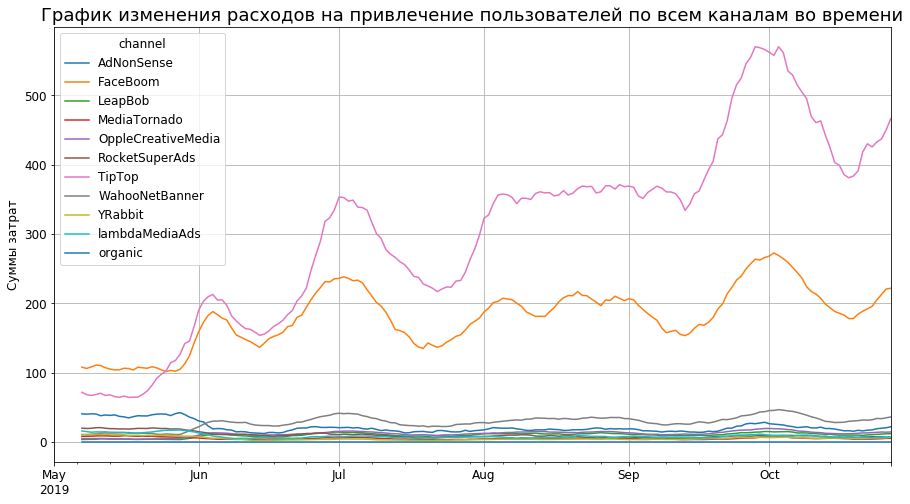

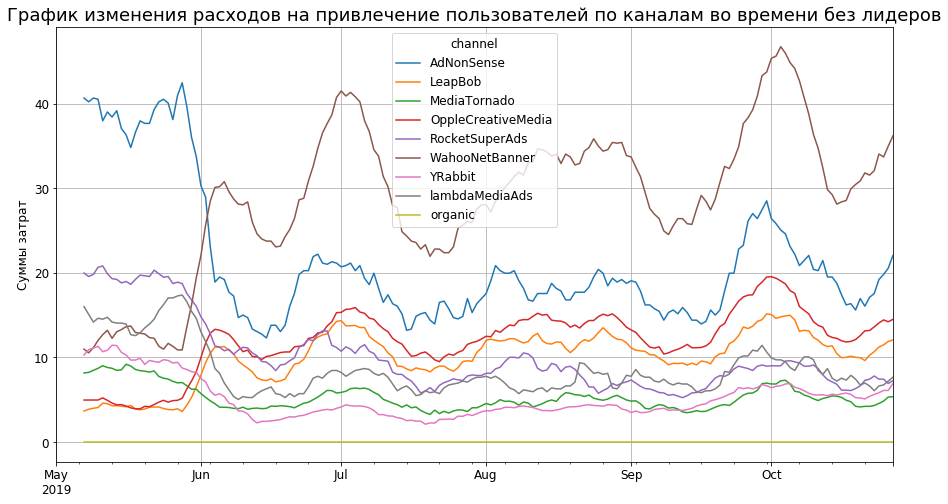

In [96]:
# таблица изменения трат по каналам во времени
acquisition_cost_dt = (profiles.pivot_table(index='channel', columns='dt',
                                           values='acquisition_cost', aggfunc='sum'))
# используем функцию сглаживания для построения графиков, предварительно транспонировав датасет
acquisition_cost_dt = filter_data(acquisition_cost_dt.T, 7)
# убираем двух явных лидеров с датафрейма, чтобы посмотреть отдельно на графике остальные каналы
acquisition_cost_dt_all_without_leader = acquisition_cost_dt.drop(['TipTop','FaceBoom'], axis=1) 
# строим график по всем каналам затраты
fig, ax = plt.subplots()
acquisition_cost_dt.plot(ax=ax, grid=True)
ax.set_title('График изменения расходов на привлечение пользователей по всем каналам во времени', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Суммы затрат')

# график каналов без лидеров по затратам
fig, ax = plt.subplots()
acquisition_cost_dt_all_without_leader.plot(ax=ax, grid=True)
ax.set_title('График изменения расходов на привлечение пользователей по каналам во времени без лидеров',\
             fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Суммы затрат');

У нас два явных лидера - каналы `TipTop` и `FaceBoom`. По ним абсолютное большинство затрат на привлечение пользователей. Затраты начиная с июня у `TipTop` постепенно увеличились в конце июня - начале июле, с небольшим спадом в середине июля, с августа по середину сентября они держались на одном уровне, взлетев на пике к октябрю.  
`FaceBoom` сначала затраты стабильны на протяжении всей рекламной компании с небольшими подъемами и спусками на протяжении периода.  
Среди остальных каналов выделяется `WahooNetBanner` сильно повторяющий график затрат лидера в течении времени. Канал `AdNonSense` в мае были большие затраты на привлечение, а после опустился ко всем остальным, кроме лидеров.
В целом остальные каналы повторяют пики и спады лидеров, только более плавно всё.

### Средняя стоимость привлечения одного пользователя из каждого источника. Средний CAC на одного пользователя для всего проекта и для каждого источника трафика.

In [97]:
# уберем из нашего анализа органических пользователей
profiles = profiles.query('channel != "organic"')

In [98]:
# средняя стоимость привлечения пользователя по проекту
# общую сумму затрат делю на всех пользователей не включая органический
cac_mean_id = profiles.acquisition_cost.sum() / len(profiles)
print(f'Средняя сумма затрат на привлечение пользователя равна {cac_mean_id:.2f} y.e.')

Средняя сумма затрат на привлечение пользователя равна 1.13 y.e.


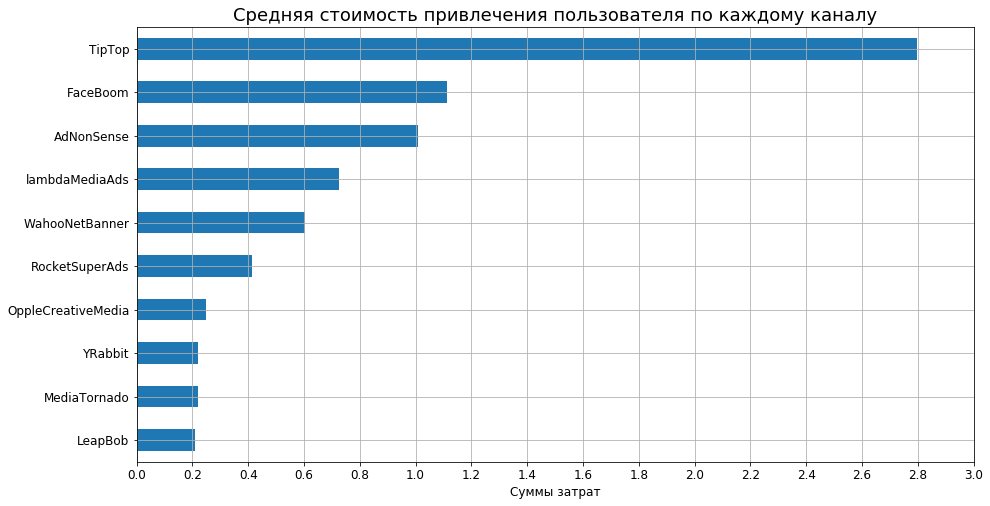

In [99]:
# таблица средняя стоимость привлечения пользователя по каналам
cac_channel = profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).\
        sort_values(by='acquisition_cost').reset_index()
 
fig, ax = plt.subplots()
cac_channel.plot(x='channel', kind='barh', ax=ax, legend=False)
ax.set_title('Средняя стоимость привлечения пользователя по каждому каналу', fontsize=18)
ax.set_xlabel('Суммы затрат')
ax.set_ylabel('')
ax.grid(True)
ax.set_xticks([x for x in np.arange(0,3.2,0.2)]);

### Промежуточные выводы

Если брать в целом по затратам на рекламу, у нас два явных лидера - каналы `TipTop` и `FaceBoom`. По ним абсолютное большинство затрат на привлечение пользователей. Один только `TipTop` израсходовал более половины всех рекламных денег. По средней стоимости привлечения на одного пользователя канал `TipTop` также явный лидер, в среднем почти `2,8 уе` стоит привлечь одного пользователя, тогда как в среднем по всем каналам это меньше в три раза.
У нас явно просматривается очень дорогой и самый часто используемый канал привлечения пользователей. В дальнейшем проверим гипотизу, что пользователи, привлечённые через канал `TipTop` не окупают затраты на своё привлечение.

## Оценка окупаемости рекламы

Используя графики `LTV`, `ROI`, `CAC`, проанализируем окупаемость рекламы.  
На календаре *1 ноября 2019 года*, а в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через *две недели* после привлечения.

In [100]:
# установим дату момента анализа
observation_date = datetime(2019, 11, 1).date()
# по бизнес плану пользователи должны окупиться не позднее, чем через 2 недели - это наш горизонт, который
# все наши пользователи должны пройти этот лайфтайм
horizon_days = 14

### Анализ общей окупаемости рекламы. Постоим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [101]:
# функция для расчёта LTV и ROI
# result_raw_gen - сырые данные
# result_grouped_gen - таблица LTV
# result_in_time_gen - таблица динамики LTV
# roi_grouped_gen - таблица ROI
# roi_in_time_gen - таблица динамики ROI
result_raw_gen, ltv_grouped_gen, ltv_in_time_gen, roi_grouped_gen, roi_in_time_gen = get_ltv(profiles, 
                df_orders, observation_date, horizon_days)

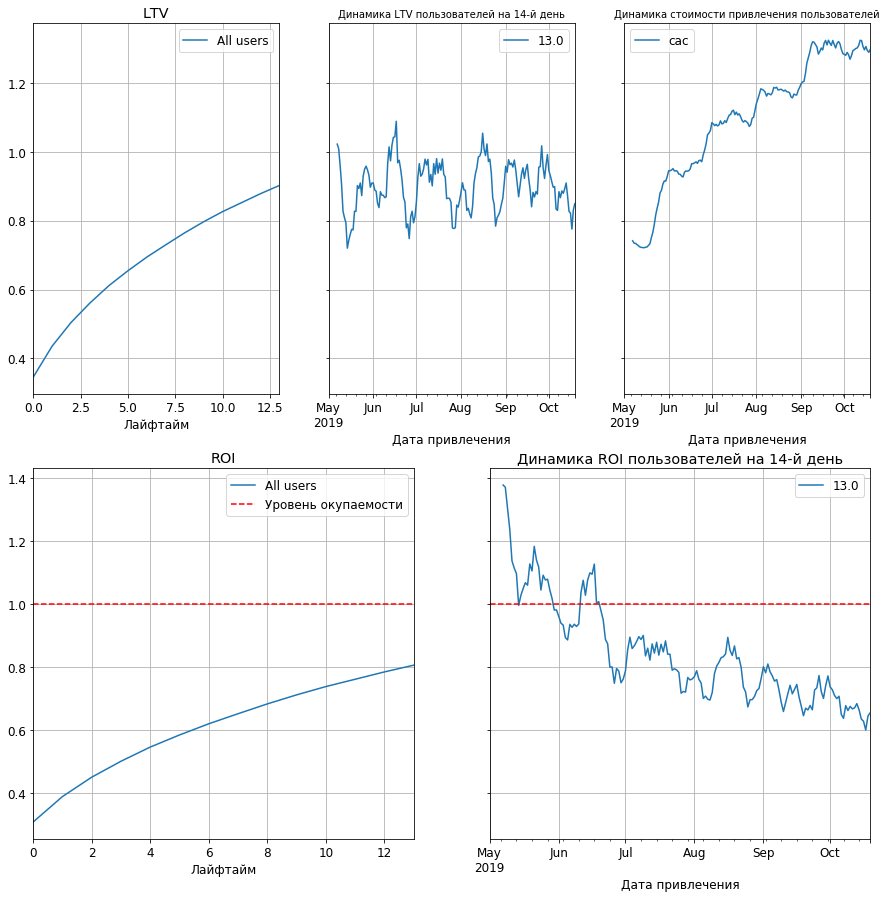

In [102]:
# функция строит график ltv, динамики Ltv, динамики cac, график roi и roi в динамики
plot_ltv_roi(ltv_grouped_gen, ltv_in_time_gen, roi_grouped_gen, roi_in_time_gen, horizon_days, window=7)

- общий LTV немного не дотягивает до посчитанного нами CAC всех пользователей 
- LTV в динамике имеет некую цикличность, с конца каждого месяца имеет подъем до середины следующего месяца, а потом спад и так повторяется
- CAC серидины мая имеет резкий рост к июню, а далее более плавное и постепенное постоянное увеличение цены привлечения пользователя
- По графикам видим, что ROi для всех пользователей окупаемость на 14 день совсем чуть-чуть не дотягивает до затрат.
- По динамике ROI в плюсе до конца июня, потом минимальный подъем и с 20х числах июля ROI уже не подымался в плюсовую 14 дневную окупаемость. 

### Анализ окупаемости рекламы с разбивкой по рекламным каналам. Постоим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Анализ с разбивкой по рекламным каналам и построение графиков я разобью на два этапа из-за возможной большой плотности на графике и так как два лидера и остальные сильно различаются из-за своего количества и влияния на общие показатели.    
- проанализируем по каналам "FaceBoom", "TipTop";
- проанализируем остальные каналы

In [103]:
# функция для расчёта LTV и ROI для каналов "FaceBoom", "TipTop"
# result_raw_two_channel - сырые данные
# result_grouped_two_channel - таблица LTV
# result_in_time_two_channel - таблица динамики LTV
# roi_grouped_two_channel - таблица ROI
# roi_in_time_two_channel - таблица динамики ROI

result_raw_two_channel, ltv_grouped_two_channel, ltv_in_time_two_channel, roi_grouped_two_channel,roi_in_time_two_channel = (get_ltv
    (profiles.query('channel in ("FaceBoom", "TipTop")'), 
     df_orders, observation_date, horizon_days, dimensions=['channel']))

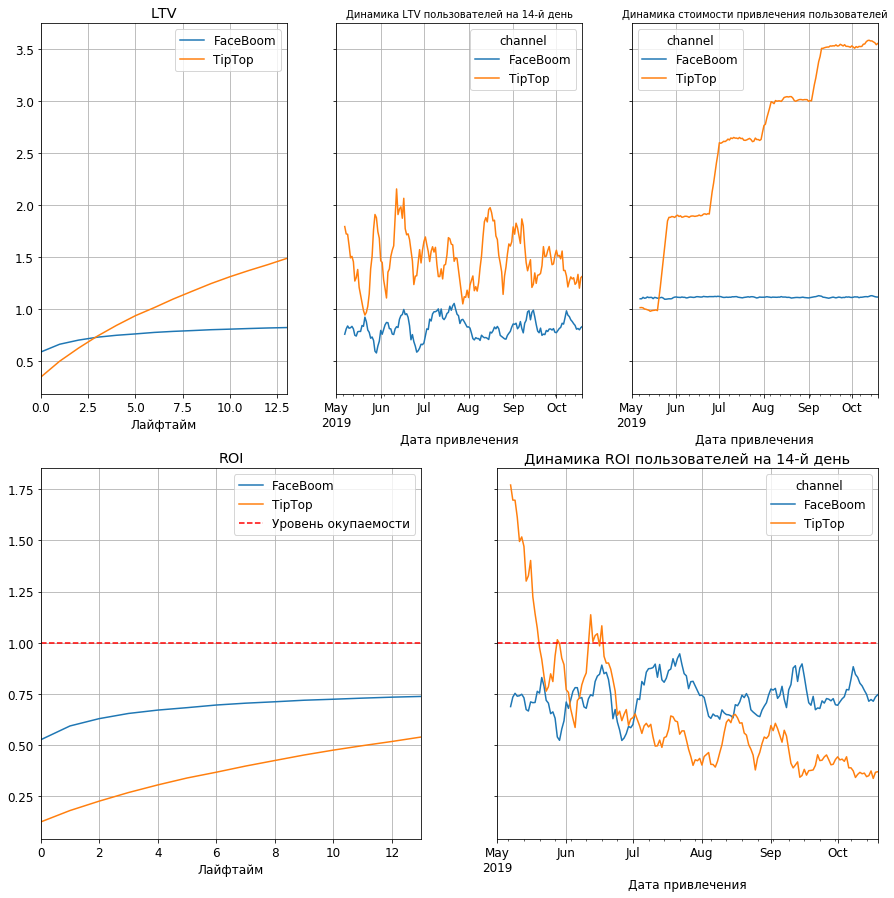

In [104]:
# функция строит график ltv, динамики Ltv, динамики cac, график roi и roi в динамики
plot_ltv_roi(ltv_grouped_two_channel, ltv_in_time_two_channel, 
             roi_grouped_two_channel, roi_in_time_two_channel, horizon_days, window=7)

- LTV по пользователям канала `FaceBoom` после привлечения первого дня в дальнейшем практически имеет нулевой рост, в отличии от канала `TipTop`, где рост LTV имеет рост со временем.
- по динамике LTV также `FaceBoom` имеет небольшие колебания, а `TipTop` больше имеет свойство с середины месяца падать, меняясь на рост. Пользователи, привлечнные в конце и в начале месяца имеют лучший потенциал окупаемости.
- стоимость привлечения пользователей у `FaceBoom` имеет на всём протяжении одну и ту же цену, а вот у `TipTop` что-то нарушилось и начиная с середины мая резко пошло вверх и увеличивалось в конце каждого месяца на протяжении всех месяцев
- ROI обоих каналов далеко не окупают себя, особенно `TipTop`
- в динамике ROI у `TipTop` до начала повышения стоимости привлечения в середине мая было положительным, а потом резко пошло вниз и уменьшалось с каждым месяцем параллельно повышению стоимости привлечения. Канал `FaceBoom` никогда не выходил в плюс за всё время анализа.

In [105]:
# функция для расчёта LTV и ROI для каналов всех каналов, кроме "FaceBoom", "TipTop"
# result_raw_another_channel - сырые данные
# result_grouped_another_channel - таблица LTV
# result_in_time_another_channel - таблица динамики LTV
# roi_grouped_another_channel - таблица ROI
# roi_in_time_another_channel - таблица динамики ROI

result_raw_another_channel, ltv_grouped_another_channel, ltv_in_time_another_channel, roi_grouped_another_channel, roi_in_time_another_channel = (get_ltv
    (profiles.query('channel not in ("FaceBoom", "TipTop")'), 
     df_orders, observation_date, horizon_days, dimensions=['channel']))

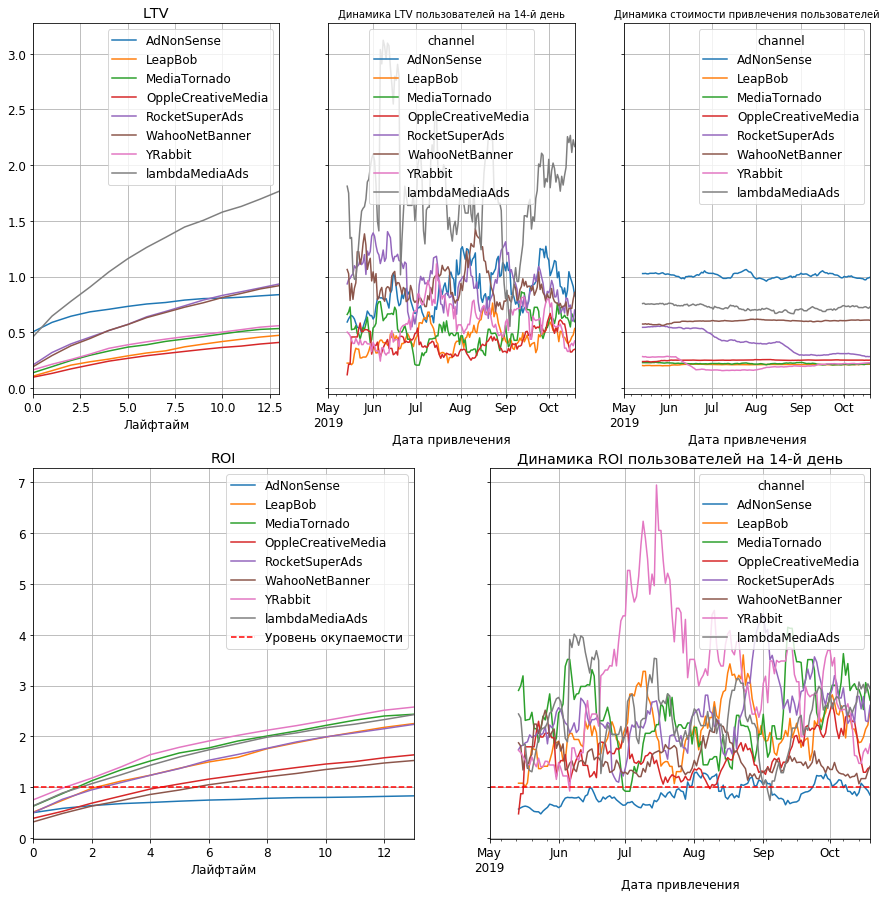

In [106]:
# функция строит график ltv, динамики Ltv, динамики cac, график roi и roi в динамики
plot_ltv_roi(ltv_grouped_another_channel, ltv_in_time_another_channel, 
             roi_grouped_another_channel, roi_in_time_another_channel, horizon_days, window=14)

- LTV самый хороший рост показывает канал `LambdaMediaAds`, самый низкий у органических пользователей, что в целом ожидаемо. По динамике похожая картина, можно только выделить резкое падение у `LambdaMediaAds` в начале сентября пользователей, привлеченных в середине августа.
- самая высокая стоимость привлечения у `AdNoneSense`, у всех в целом стоимость привлечения не меняется со временем, выделяется только `RocketSuperAds`, у которого в середине августа стоимость привлечения снизилась.
- ROI все каналы уходят в плюс уже со второго по седьмой день, кроме `AdNoneSense`, который так и не достигает окупаемости к 14 дню, как мы помним у него самая высокая стоимость привлечения среди всех не топов. Самая лучшая окупаемость у канала `YRabbit`, особенно выделяются в динамике июль-август месяц.

### Анализ окупаемости рекламы с разбивкой по странам. Постоим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [107]:
# функция для расчёта LTV и ROI для каналов "FaceBoom", "TipTop"
# result_raw_region - сырые данные
# result_grouped_region - таблица LTV
# result_in_time_region - таблица динамики LTV
# roi_grouped_region - таблица ROI
# roi_in_time_region - таблица динамики ROI

result_raw_region, ltv_grouped_region, ltv_in_time_region, roi_grouped_region, roi_in_time_region = (get_ltv
    (profiles, df_orders, observation_date, horizon_days, dimensions=['region']))

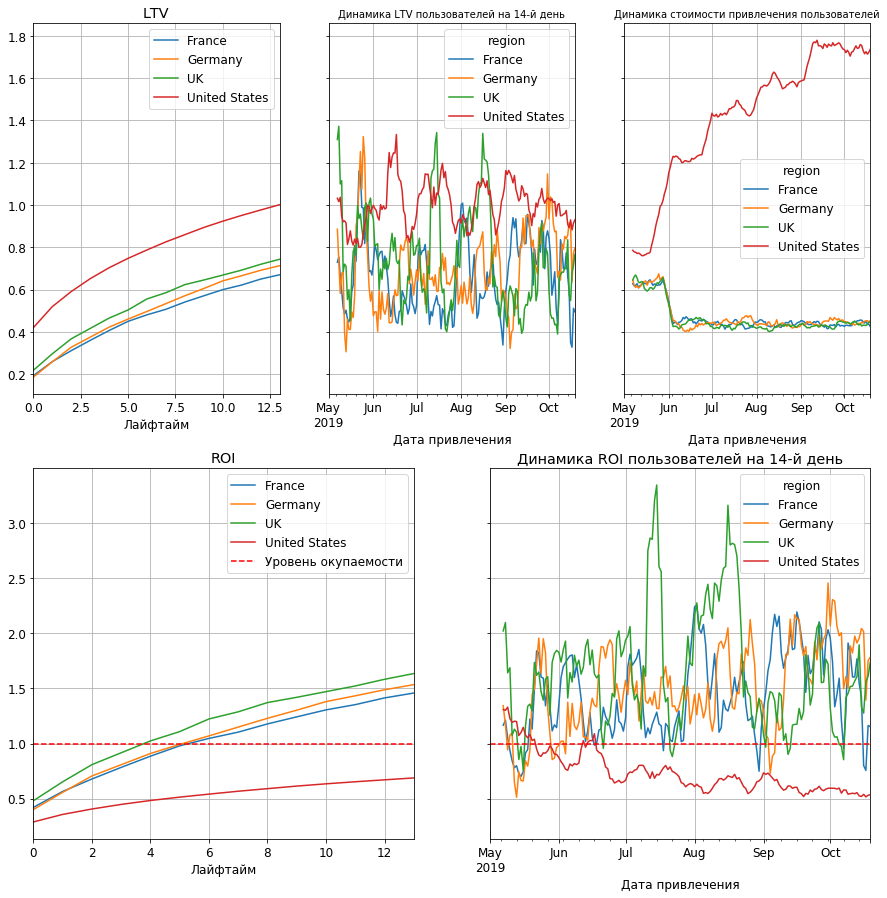

In [108]:
# функция строит график ltv, динамики Ltv, динамики cac, график roi и roi в динамики
plot_ltv_roi(ltv_grouped_region, ltv_in_time_region, 
             roi_grouped_region, roi_in_time_region, horizon_days, window=7)

- самый большой LTV у США, остальные идут достаточно ровно с небольшим отставанием Франция
- в динамике все страны выделяются перепадами в ту или иную сторону. Особенно штормит Британию и Германию.
- CAC во всех странах с течением времени не меняется, кроме США. в США идёт резкое повышение стоимости привлечения пользователя очень похожее по тенденции с каналом `TipTop`
- самый лучший ROI у Британии, немного ниже идут Германия и Франция, США не преодолевают уровень окупаемости пользователя.
- такая же ситуация ROI в динамике - США начиная с середины июня перестает преодолевать точку окупаемости, также в последние месяцы Британия в некоторые моменты опускается к точке безубыточности вниз с хороших позиций.

### Промежуточные выводы

Проанализировав окупаемость рекламы, можем сделать выводы:  
- в целом за исследуемый период наша ROI совсем чуть-чуть не дотягивает до расходов, бизнес-план не выполняется, с серидины июля ROI падает ниже отметки окупаемости и далее не подымается. С конца мая фиксируется резкий скачок расходов и далее только увеличиваются расходы.
- оба канала `"FaceBoom"`, `"TipTop"` убыточны. У `"TipTop"` доходы LTV растут вместе с расходами, но из-за постоянного повышения стоимости привлечения пользователя, доходы не успевают за расходами. А вот у `"FaceBoom"` картина иная - у них расхода на одном уровне, а дохода с течением времени практически не повышаются. У обоих каналов очень низкий показатель ROI.
- у всех остальных каналов ROI положительный, за исключением `AdNoneSense`, у которого самая высокая стоимость привлечения пользователей среди остальных каналов, кроме двух отдельных. Можно выделить каналы `YRabbit`- он самый доходный и по всем параметрам хорош. Также все оставшиеся каналы тоже хороши и приносят прибыль.
- по странам США убыточны, остальные страны пользователи прибыльны, лучше всего дела в Британии. По США лушие показатели по LTV, но из-за высокого роста на стоимость привлечения, доходы нивелируются и не успевают за расходами. График расходов у США очень похож на таковой у канала `"TipTop"`, что можно предположить, что этим каналом пользуются только американские пользователи.

### Строим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Для расчётов conversion и retention я оставлю период 14 дней, чтобы оценить удержание и конверсию к периоду окупаемости по бизнес плану.

#### Конверсия и удержание с разбивкой по устройствам

In [109]:
# функция считает retention по девайсам
result_raw_ret_dev, result_grouped_ret_dev, result_in_time_ret_dev = get_retention(\
    profiles, df_visits, observation_date, horizon_days, dimensions=['device'])
# функция считает conversion по девайсам
result_raw_con_dev, result_grouped_con_dev, result_in_time_con_dev = get_conversion(\
    profiles, df_orders, observation_date, horizon_days, dimensions=['device'])

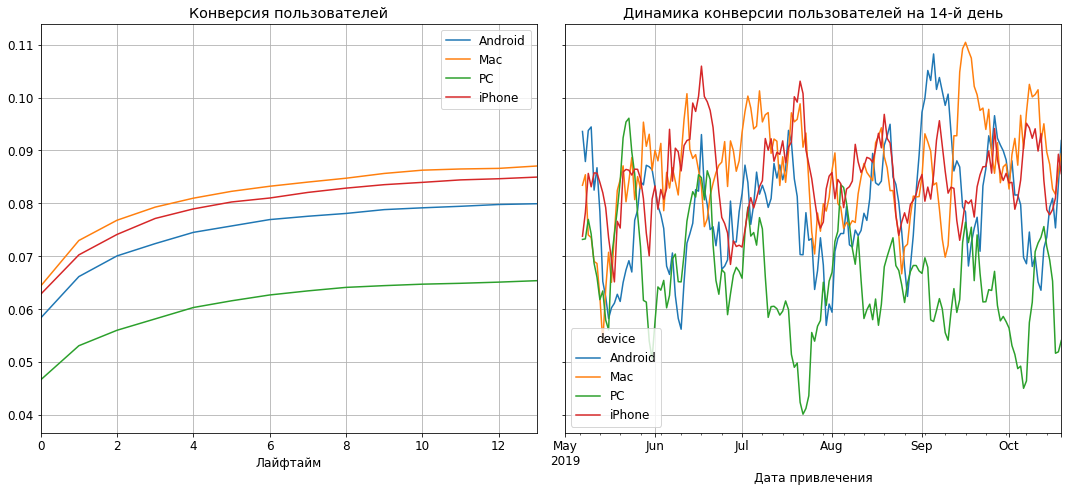

In [110]:
# графики конверсии по девайсам
plot_conversion(result_grouped_con_dev, result_in_time_con_dev, horizon_days, window=7)

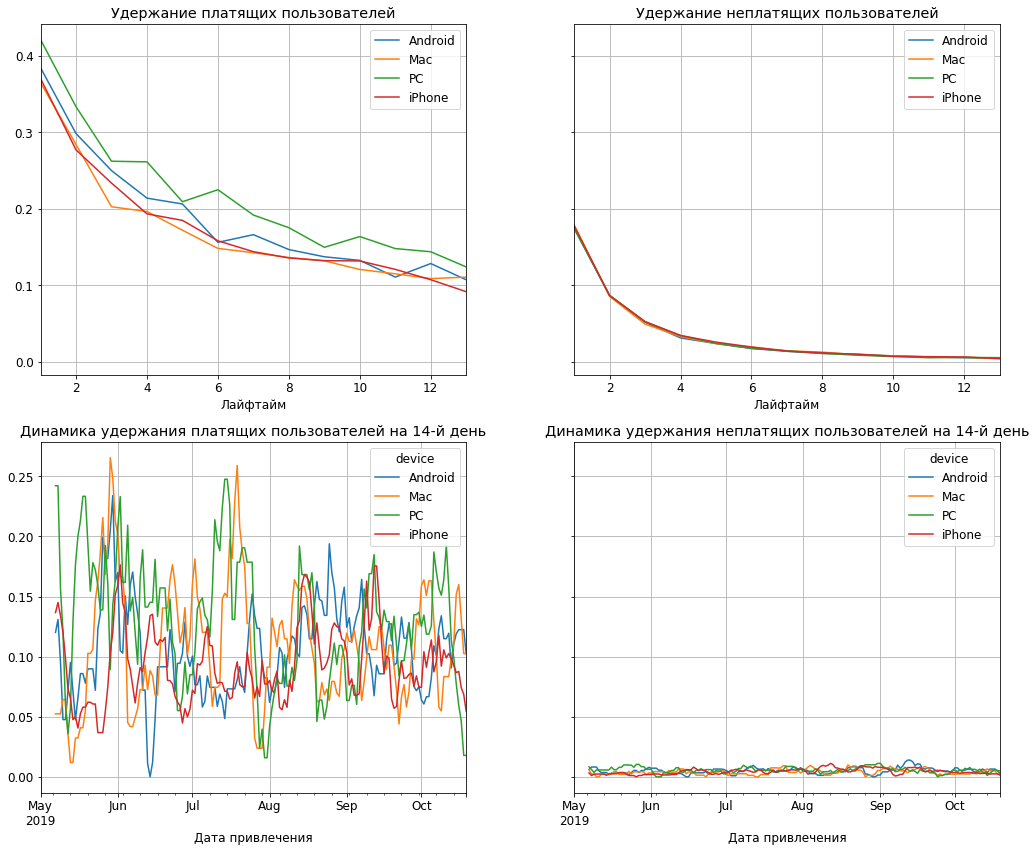

In [111]:
# графики удержания пользователей по девайсам
plot_retention(result_grouped_ret_dev, result_in_time_ret_dev, horizon_days, window=7)

#### Конверсия и удержание с разбивкой по странам

In [112]:
# функция считает retention по странам
result_raw_ret_reg, result_grouped_ret_reg, result_in_time_ret_reg = get_retention(\
    profiles, df_visits, observation_date, horizon_days, dimensions=['region'])
# функция считает conversion по странам
result_raw_con_reg, result_grouped_con_reg, result_in_time_con_reg = get_conversion(\
    profiles, df_orders, observation_date, horizon_days, dimensions=['region'])

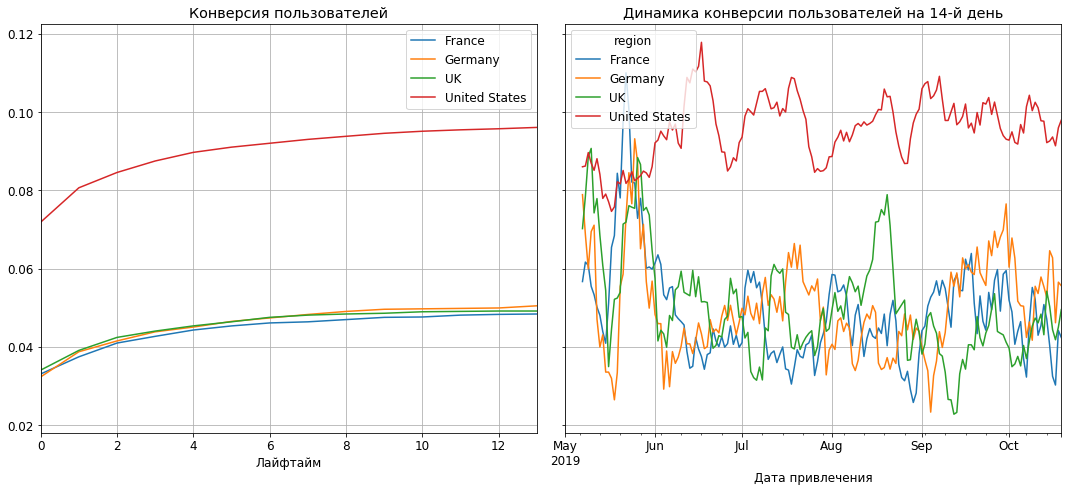

In [113]:
# графики конверсии по странам
plot_conversion(result_grouped_con_reg, result_in_time_con_reg, horizon_days, window=7)

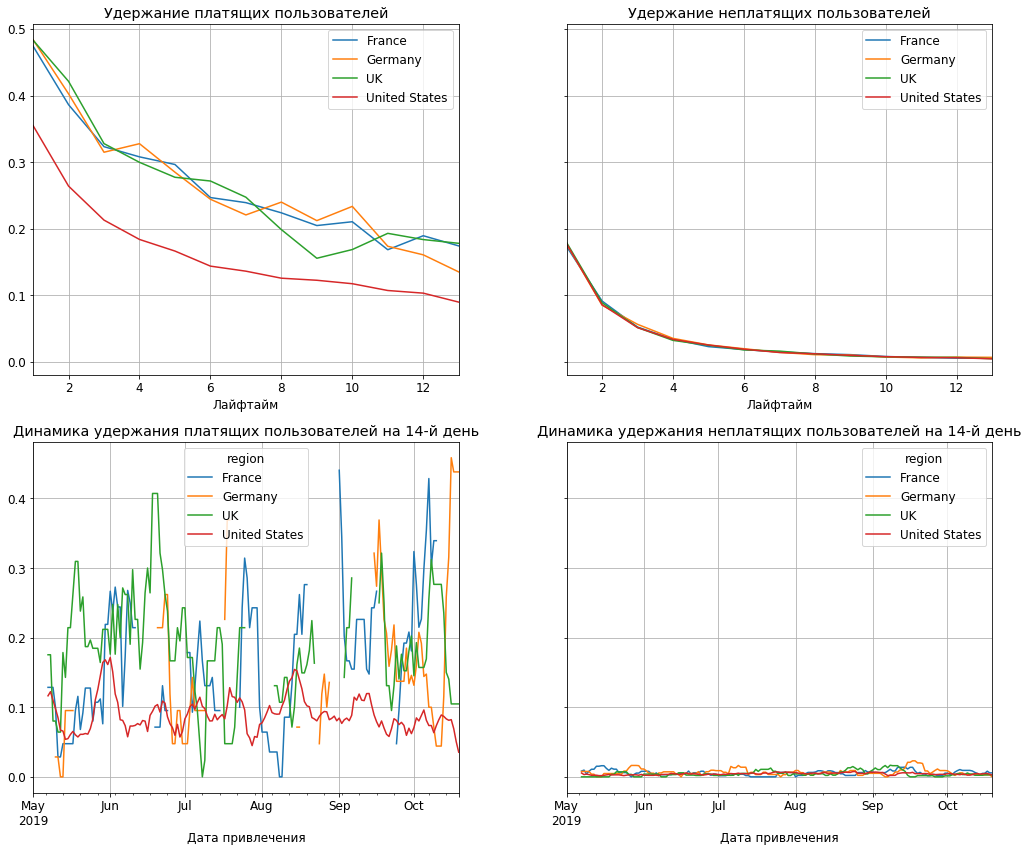

In [114]:
# графики удержания пользователей по странам
plot_retention(result_grouped_ret_reg, result_in_time_ret_reg, horizon_days, window=7)

#### Гипотиза, что пользователи двух топ рекламных каналов по привлечению пользователей в основном из США

In [115]:
# количество пользователей из первых топ каналов по привлечению по регионам
profiles.query('channel in ("TipTop", "FaceBoom")').groupby('region')['user_id'].count()

region
United States    48705
Name: user_id, dtype: int64

Мы видим, что все пользователи из привлеченных каналов "TipTop", "FaceBoom" из США.

In [116]:
# разбивка пользователей из США по каналам прихода
profiles.query('region == "United States"').groupby('channel').user_id.count().sort_values(ascending=False)

channel
FaceBoom          29144
TipTop            19561
RocketSuperAds     4448
MediaTornado       4364
YRabbit            4312
Name: user_id, dtype: int64

#### Конверсия и удержание с разбивкой по рекламным каналам

In [117]:
# функция считает retention по рекламным каналам
result_raw_ret_chan, result_grouped_ret_chan, result_in_time_ret_chan = get_retention(\
    profiles, df_visits, observation_date, horizon_days, dimensions=['channel'])
# функция считает conversion по рекламным каналам
result_raw_con_chan, result_grouped_con_chan, result_in_time_con_chan = get_conversion(\
    profiles, df_orders, observation_date, horizon_days, dimensions=['channel'])

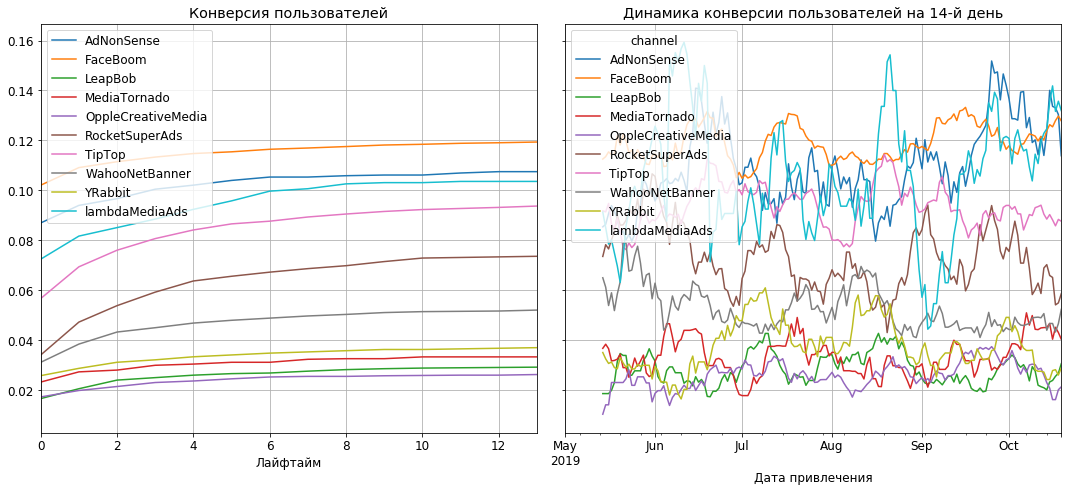

In [118]:
# графики конверсии по рекламным каналам
plot_conversion(result_grouped_con_chan, result_in_time_con_chan, horizon_days, window=14)

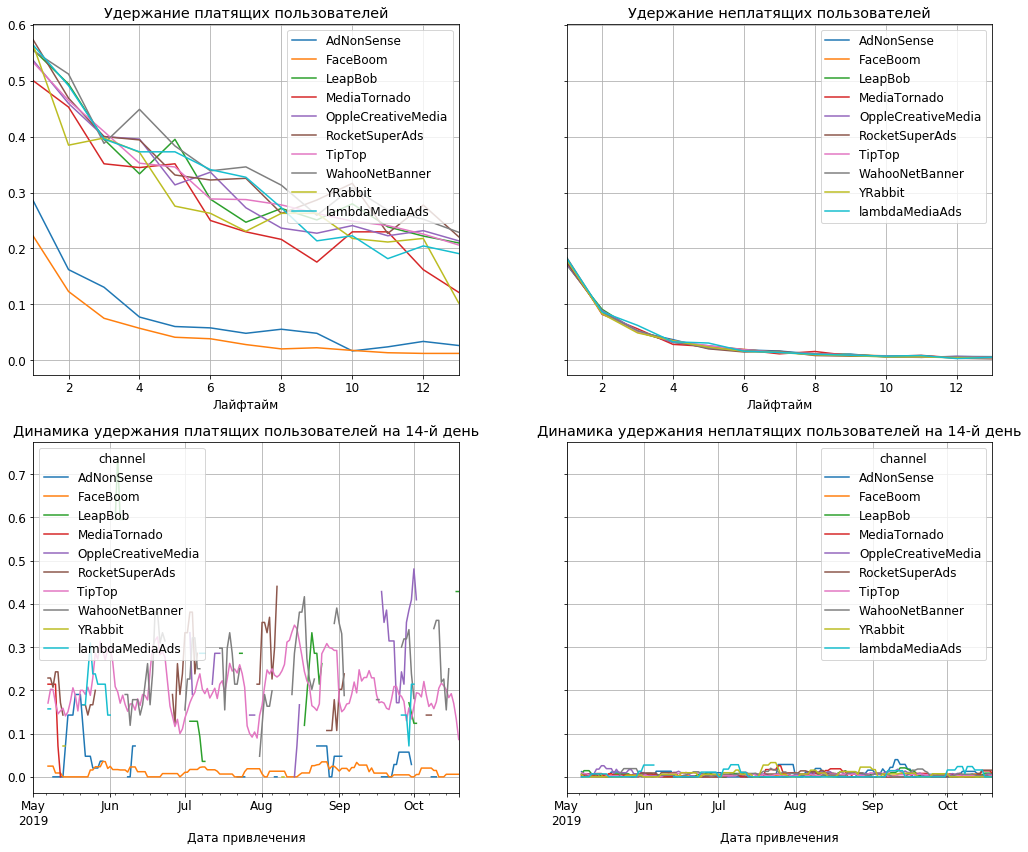

In [119]:
# графики удержания пользователей по рекламным каналам
plot_retention(result_grouped_ret_chan, result_in_time_ret_chan, horizon_days, window=7)

#### Возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела

Ответим на вопросы:  
- Окупается ли реклама в целом?  
 *реклама, если брать все каналы в целом за 14 дней, согласно бизнес-плана не окупается*  
- Какие устройства, страны и каналы могут снижать окупаемость рекламы?  
 *все страны, кроме США окупают рекламу, так как два топ канала привлекает пользователей из США, первые три самых дорогих канала в среднем по привлечению пользователя не окупают рекламу, остальные каналы в плюсе; по девайсам можно сказать, что большинство пользователей США имеют Мак и айфон, а они в минусе по окупаемости.*  
- Чем могут быть вызваны проблемы окупаемости?  
 *самые большие проблемы в окупаемости в первых двух каналах по продажам - с этим надо будет разобраться*  
 
Необходимо разобраться с причинами повышения затрат на пользователя каждый месяц у канала `TipTop` и если не снизить кардинально цену привлечения, отказаться от их услуг, так как рекламный канал не окупает себя дороговизной.  
 Канал `FaceBoom` по графикам видим есть хорошая конверсия в первую покупку и дальше практически все пользователи пропадают - это возможно какие-то приёмы или акции канала по привлечению на первую покупку или какие-то боты пользователи - надо провести исследование или расследование и разобраться с этим.

## Выводы

### Причины неэффективности привлечения пользователей.

**больше 50% пользователей привлекли два самых дорогих канала. По каналу `TipTop` есть вопросы со стоимостью рекламы и здесь вопросы к рекламному отделу по повышению стоимости каждый месяц привлечения.  
По каналу `FaceBoom` привлечение самого большого числа пользователей, которые вызывают вопросы.  
Возможно дорогие привлеченные пользователи нерелевантны, как пользователи для нашего приложения, эффективнее ставку ставку делать на более дешёвых пользователей.**

### Рекомендации для отдела маркетинга

1. **Провести расследование или разобраться по пользователям канала `FaceBoom`. Пользователи очень слабо удерживаются, хотя и с лучшей конверсией - либо это боты, привлеченные по какой-то акции, либо абсолютно не релевантные пользователи приложению - покупают сразу что-то в приложении или доступ и уходят, так как нет удержания.**
2. **Провести переговоры по кардинальному снижению цены по привлечению по каналу `TipTop` либо расторгнуть соглашение, так как цена привлечения очень высокая и не окупает вложенные средства.**
3. **Увеличить вложения в рекламные каналы `RocketSuperAds`, `YRabbit`, `MediaTornado` они показывают хорошую стабильную окупаемость и транслируют как раз пользователей США, по которым у нас два проблемных канала, описанных выше.**  
4. **Также рекомендую увеличить вложение в рекламный канал `LambdaMediaAds`- он показывает стабильные хорошие результаты окупаемости**
5. **По каналу `AdNoneSense` пока нет окупаемости в течении двух недель, можно попробовать снизить цену привлечения или отказываться от данного канала** 